## Positie


Gegeven een CSV-bestand (gescheiden door ; en de decimal-separator . ) met daarin in de eerste kolom de tijd, in de volgende kolommen de posities van de voertuigen, de volgende gegevens te bepalen:

 Voor elk voertuig de maximum en minimum snelheid.
 Een grafiek (in python code met matplotlib) van de snelheden van alle voertuigen over de gegeven tijdsperiode (van minimum tijdstip tot maximum tijdstip in het bestand).



De volgende code leest de data uit en berekend de snelheden van de 2 auto's

In [14]:
import csv
import matplotlib.pyplot as plt
    
f = open("C:/Users/lucas/UntitledFolder/posities.csv","r")

with f as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    lineNumber = 0

    lijstVCar1 = []
    lijstVCar2 = []
    lijstTijd = []

    for row in csv_reader:
        tijd = float(row[0])
        car1_v2 = float(row[1])
        car2_v2 = float(row[2])

        if lineNumber != 0:
            deltaT = tijdOud - tijd
            deltaV1 = car1_v1 - car1_v2
            deltaV2 = car2_v1 - car2_v2

            snelheidCar1 = deltaV1 / deltaT
            snelheidCar2 = deltaV2 / deltaT

            lijstVCar1.append(snelheidCar1)
            lijstVCar2.append(snelheidCar2)
            lijstTijd.append(tijd)

        car1_v1 = car1_v2
        car2_v1 = car2_v2
        tijdOud = tijd
        lineNumber += 1



De volgende code maakt van de berkende gegevens een grafiek

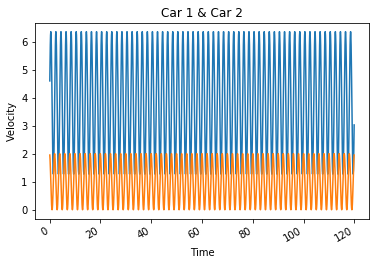

In [15]:
    data = {'velocity': lijstVCar1,
            'time': lijstTijd}

    data2 = {'velocity': lijstVCar2,
            'time': lijstTijd}

    plt.figure(1)
    plt.plot(data['time'], data['velocity'])
    plt.plot(data2['time'], data2['velocity'])
    plt.gcf().autofmt_xdate()
    plt.title('Car 1 & Car 2')
    plt.ylabel('Velocity')
    plt.xlabel('Time')
    plt.show()

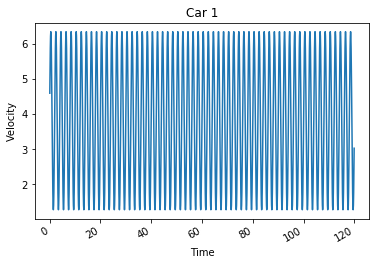

In [16]:
    plt.plot(data['time'], data['velocity'])
    plt.gcf().autofmt_xdate()
    plt.title('Car 1')
    plt.ylabel('Velocity')
    plt.xlabel('Time')
    plt.show()

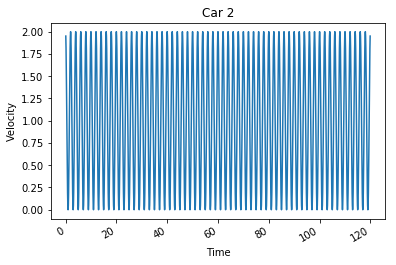

In [17]:
    plt.plot(data2['time'], data2['velocity'])
    plt.gcf().autofmt_xdate()
    plt.title('Car 2')
    plt.ylabel('Velocity')
    plt.xlabel('Time')
    plt.show()

## Botsingen

Gegeven een CSV-bestand (gescheiden door ; en de decimal-separator .  met de eerste rij de huidige positie van de voertuigen) met daarin in de eerste kolom de tijd, in de volgende kolommen de snelheid van de voertuigen, de volgende gegevens te bepalen:

    -Het tijdstip van de eerste botsing en welke voertuigen dit zijn (nummer van de kolom is het id van het voertuig).
 
    -Een grafiek (in python code met matplotlib) van de posities van de voertuigen over de gegeven tijdsperiode (van minimum tijdstip tot maximum tijdstip in het bestand).


In [18]:
import csv
import matplotlib.pyplot as plt

f = open("C:/Users/lucas/UntitledFolder/snelheden.csv","r")

with f as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    lineNumber = 0

    for row in csv_reader:
        if lineNumber == 0:
            #Haalt de start postitie op en zet deze om van een string naar een float
            startPositionC_1 = float(row[1])
            startPositionC_2 = float(row[2])
            startPositionC_3 = float(row[3])

            list_position_C_1 = [startPositionC_1]
            list_position_C_2 = [startPositionC_2]
            list_position_C_3 = [startPositionC_2]

            postion_C_1 = startPositionC_1
            postion_C_2 = startPositionC_2
            postion_C_3 = startPositionC_3

            lineNumber += 1

        else:
            #Haalt de huidige positie op door de oude te nemen en daar de snelheid bij op te tellen
            postion_C_1 += float(row[1])
            postion_C_2 += float(row[2])
            postion_C_3 += float(row[3])

            list_position_C_1.append(postion_C_1)
            list_position_C_2.append(postion_C_2)
            list_position_C_3.append(postion_C_3)
            

        #bereken waar de botsingen plaats vinden
        if (startPositionC_1 > startPositionC_2 and postion_C_2 >= postion_C_1) or (startPositionC_2 > startPositionC_1 and postion_C_1 >= postion_C_2):
            print("Er was een botsing tussen A en B op de rij" + str(float(row[0]) * 10))

            # Dit zorgt ervoor dat het programma niet voor alle regels na de botsing aangeeft dat er een botsing plaatsvind
            startPositionC_1 = postion_C_1
            startPositionC_2 = postion_C_2

        elif (startPositionC_1 > startPositionC_3 and postion_C_3 >= postion_C_1) or (startPositionC_3 > startPositionC_1 and postion_C_1 >= postion_C_3):
            print("Er was een botsing tussen A en c op de rij " + str(float(row[0]) * 10))

            # Dit zorgt ervoor dat het programma niet voor alle regels na de botsing aangeeft dat er een botsing plaatsvind
            startPositionC_1 = postion_C_1
            startPositionC_3 = postion_C_3

        elif (startPositionC_2 > startPositionC_3 and postion_C_3 >= postion_C_2) or (startPositionC_3 > startPositionC_2 and postion_C_2 >= postion_C_3):
            print("Er was een botsing tussen B en c op de rij " + str(float(row[0]) * 10))

            #Dit zorgt ervoor dat het programma niet voor alle regels na de botsing aangeeft dat er een botsing plaatsvind
            startPositionC_2 = postion_C_2
            startPositionC_3 = postion_C_3



Er was een botsing tussen A en c op de rij 0.0


Deze cell laat de grafiek zien. <br>
Groen = Auto 3 <br>
Blauw = Auto 2 <br>
Oranje = Auto 1 <br>

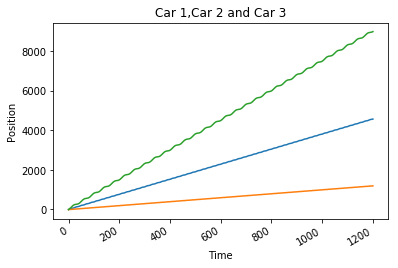

In [19]:
    plt.figure(1)
    plt.plot(list_position_C_1)
    plt.plot(list_position_C_2)
    plt.plot(list_position_C_3)
    plt.gcf().autofmt_xdate()
    plt.title('Car 1,Car 2 and Car 3')
    plt.ylabel('Position')
    plt.xlabel('Time')
    plt.show()

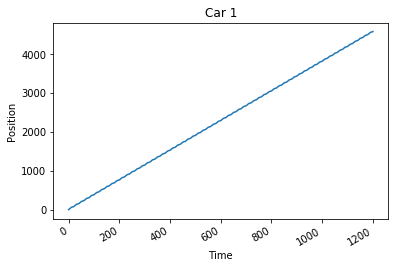

In [20]:
plt.figure(1)
plt.plot(list_position_C_1)

plt.gcf().autofmt_xdate()
plt.title('Car 1')
plt.ylabel('Position')
plt.xlabel('Time')
plt.show()

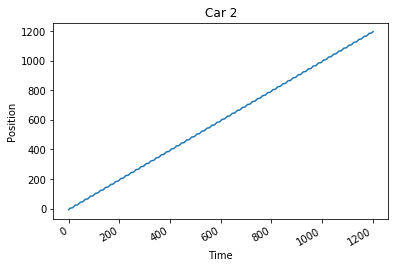

In [21]:
plt.figure(1)

plt.plot(list_position_C_2)

plt.gcf().autofmt_xdate()
plt.title('Car 2')
plt.ylabel('Position')
plt.xlabel('Time')
plt.show()

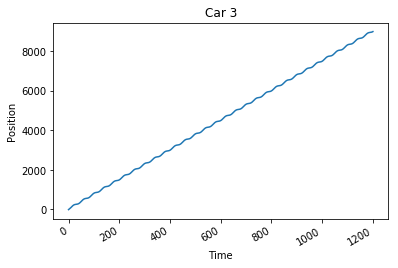

In [22]:
plt.figure(1)
plt.plot(list_position_C_3)

plt.gcf().autofmt_xdate()
plt.title('Car 3')
plt.ylabel('Position')
plt.xlabel('Time')
plt.show()